# Compute  PCA with Method 2 ICA

- use ICA scikit learn from scikit learn

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022/12/27

In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
import pandas as pd
from itertools import cycle, islice

from astroML.utils.decorators import pickle_results


In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [3]:
from sklearn.decomposition import NMF, FastICA, PCA

In [4]:
from astropy.io import fits

In [5]:
filename = 'datatools/pca_SL_data.fits'
hdu = fits.open(filename)
data_in=hdu[0].data

In [6]:
data_in

array([[0.00000000e+00, 9.10000000e+01, 9.40000000e+01, ...,
        9.95000000e+03, 9.97000000e+03, 9.99000000e+03],
       [0.00000000e+00, 4.97839069e-07, 5.52382959e-07, ...,
        7.06085364e-05, 7.06330908e-05, 7.05906948e-05],
       [0.00000000e+00, 1.19574179e-06, 1.27758431e-06, ...,
        4.46025945e-05, 4.46908296e-05, 4.46647757e-05],
       ...,
       [7.36000000e+02, 2.14675694e-06, 2.50389986e-06, ...,
        2.12861759e-05, 2.12363909e-05, 2.11664152e-05],
       [7.37000000e+02, 8.31448778e-07, 9.57832321e-07, ...,
        7.00733914e-05, 6.99426115e-05, 7.00519814e-05],
       [7.38000000e+02, 7.21010321e-08, 8.01113405e-08, ...,
        1.50517900e-04, 1.50795383e-04, 1.50744720e-04]])

In [7]:
NSED = data_in.shape[0]-3
NWL = data_in.shape[1]-1

In [8]:
wavelengths = data_in[0,1:] 
flambdas_average = data_in[1,1:] 
flambdas_std = data_in[2,1:] 
spec = data_in[3:,1:] 
all_numbers = data_in[3:,0] 

In [9]:
#flux = dfluxnorm*flambdas_std +  flambdas_average

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_75439/1659706449.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'Flux average')

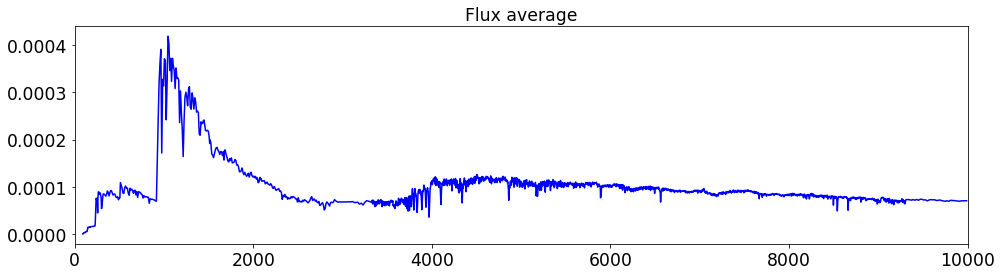

In [10]:
plt.figure(figsize=(16,4))
plt.plot(wavelengths,flambdas_average,'b-')
plt.xlim(0.,10000.)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title("Flux average")

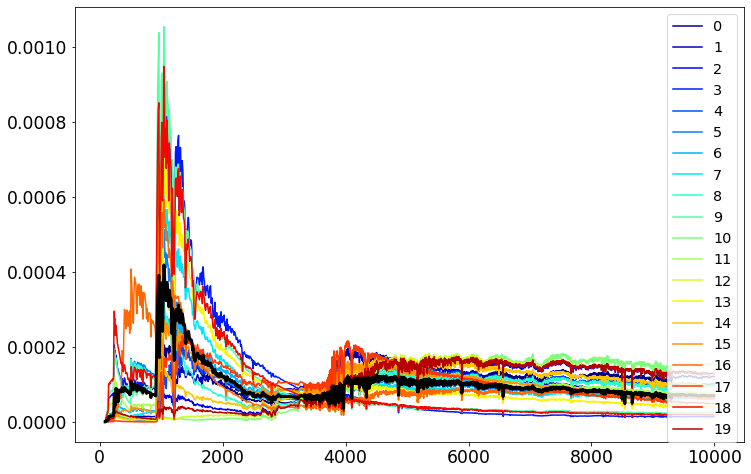

In [11]:
# wavelength bin colors
NTOPLOT=20
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)


fig = plt.figure(figsize=(12, 8))

for idx in np.arange(20):
    plt.plot(wavelengths,spec[idx,:],color=all_colors[idx],label=str(idx))

plt.legend()
spec_mean = spec.mean(0)
plt.plot(wavelengths,spec_mean,"k-",lw=3)
#plt.ylim(0,50.)

In [12]:
#https://www.astroml.org/astroML-notebooks/chapter7/astroml_chapter7_Dimensionality_Reduction.html
#https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca

In [13]:
Ncomp=51
#ica = FastICA(n_components=Ncomp, random_state=0,whiten="arbitrary-variance")
ica = FastICA(n_components=Ncomp, random_state=0,whiten='unit-variance')
ica.fit(spec.T)
ica_comp = np.vstack([flambdas_average,ica.transform(spec.T).T])
X_transformed = ica.fit_transform(spec.T)

In [14]:
X_transformed.shape

(6361, 51)

In [15]:
ica.transform(spec.T).shape

(6361, 51)

In [16]:
ica_comp.shape

(52, 6361)

In [17]:
import copy
X = copy.deepcopy(spec)
n_samples = X.shape[0]
X -= np.mean(X, axis=0)
cov_matrix = np.dot(X.T, X) / n_samples
evecs = []
evals = []
for idx in range(Ncomp):
    eigenvector = ica_comp[idx+1,:]
    eigenvalue = np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector))
    evecs.append(eigenvector)
    evals.append(eigenvalue)
    print(f"eigen value {idx} : ",eigenvalue)

eigen value 0 :  4.64003131928893e-08
eigen value 1 :  3.168224342258402e-08
eigen value 2 :  1.046896933813509e-09
eigen value 3 :  7.091573807769989e-11
eigen value 4 :  1.4764225947474445e-07
eigen value 5 :  7.816513084275942e-11
eigen value 6 :  3.563002119137499e-07
eigen value 7 :  4.0210864273614525e-10
eigen value 8 :  3.4895736912634207e-07
eigen value 9 :  8.086894340913766e-07
eigen value 10 :  2.9558320329991127e-09
eigen value 11 :  2.6292496283728433e-08
eigen value 12 :  4.062048816976981e-11
eigen value 13 :  2.832243575334296e-07
eigen value 14 :  7.667764056876855e-10
eigen value 15 :  4.011720568627855e-09
eigen value 16 :  1.3508099403001463e-07
eigen value 17 :  4.941436503975351e-09
eigen value 18 :  5.107293411018243e-07
eigen value 19 :  8.981666162597842e-08
eigen value 20 :  2.503528166980067e-08
eigen value 21 :  6.057520916644956e-08
eigen value 22 :  7.06583309801236e-07
eigen value 23 :  1.9051449621502125e-07
eigen value 24 :  9.222842890430561e-08
eigen

In [18]:
#ica.mixing_

In [19]:
evecs = np.vstack(evecs)
evals=np.array(evals)

In [20]:
evals_cs = evals.cumsum()
evals_cs /= evals_cs[-1]

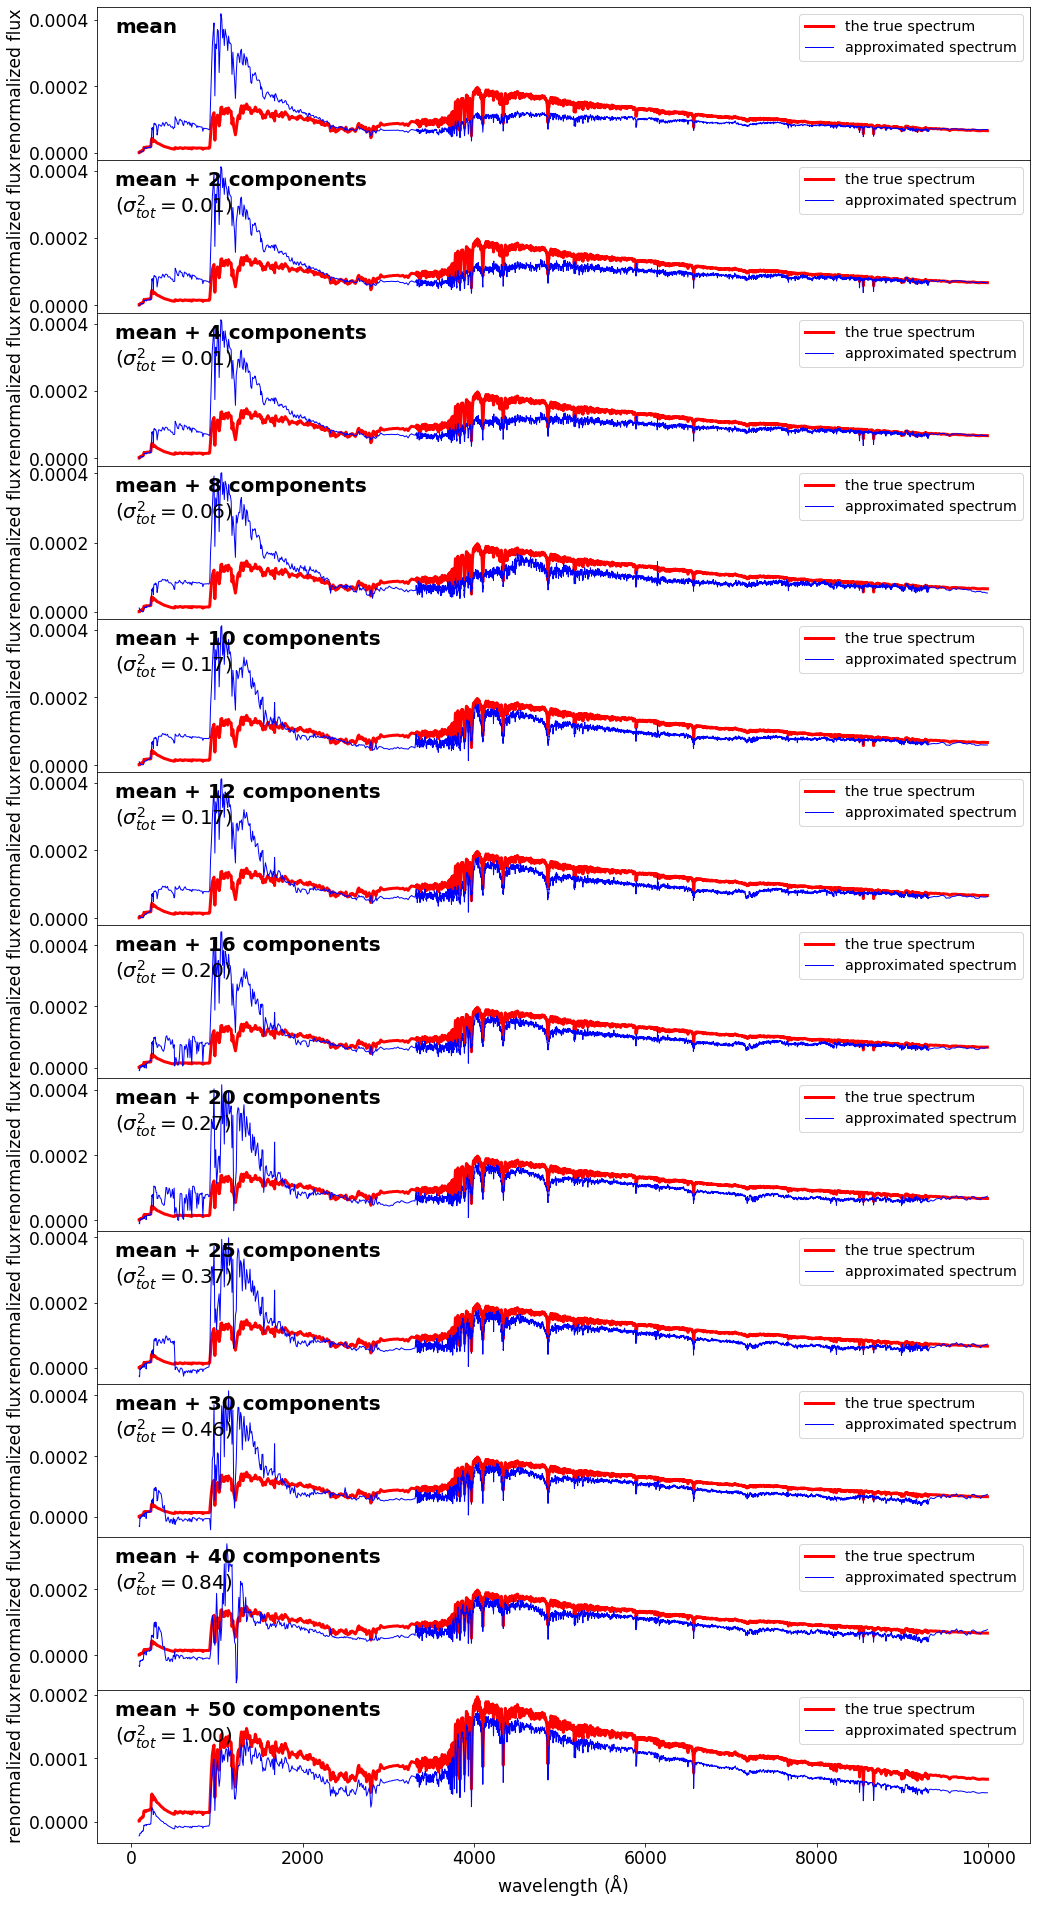

In [21]:
#------------------------------------------------------------
# Find the coefficients of a particular spectrum
idx=1
the_spec = spec[idx,:]
coeff = np.dot(evecs, the_spec - spec_mean)

#------------------------------------------------------------
# Plot the sequence of reconstructions
fig = plt.figure(figsize=(16, 30))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i, n in enumerate([0, 2 , 4, 8, 10 , 12, 16, 20,25,30, 40, 50]):
    ax = fig.add_subplot(12,1,1 + i)
    ax.plot(wavelengths, the_spec, '-', color='red',lw=3,label="the true spectrum")
    ax.plot(wavelengths, spec_mean + np.dot(coeff[:n], evecs[:n]), '-b',lw=1,label="approximated spectrum")

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    #ax.set_ylim(-2, 21)
    ax.set_ylabel('renormalized flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes,fontsize=20,fontweight="bold")
    ax.legend()

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()

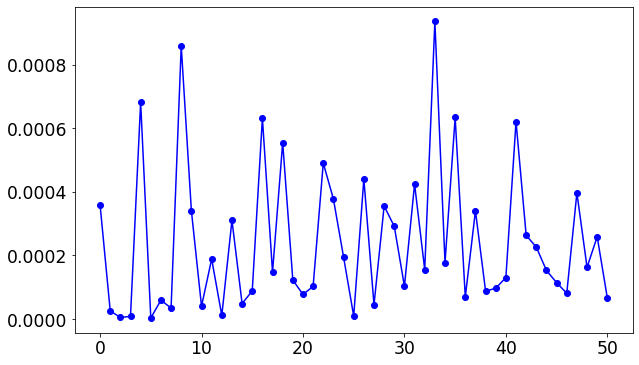

In [22]:
#plt.step(np.arange(len(coeff)),coeff)
plt.plot(range(len(coeff)),np.abs(coeff),'ob-')

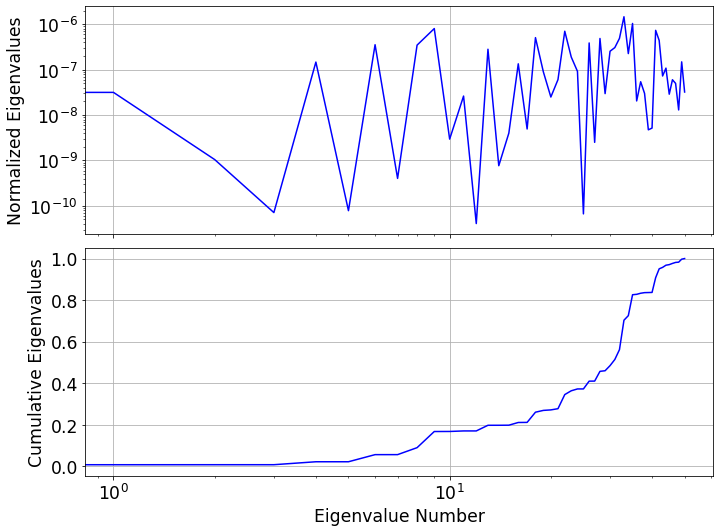

In [23]:
fig = plt.figure(figsize=(10, 7.5))
fig.subplots_adjust(hspace=0.05, bottom=0.12)

ax = fig.add_subplot(211, xscale='log', yscale='log')
ax.grid()
ax.plot(evals, c='b')
ax.set_ylabel('Normalized Eigenvalues')
ax.xaxis.set_major_formatter(plt.NullFormatter())
#ax.set_ylim(5E-4, 100)

ax = fig.add_subplot(212, xscale='log')
ax.grid()
ax.semilogx(evals_cs, color='b')
ax.set_xlabel('Eigenvalue Number')
ax.set_ylabel('Cumulative Eigenvalues')
#ax.set_ylim(0.65, 1.00)
plt.tight_layout()
plt.show()
